## The machine Learning pipeline will be as follows

1. Import data
2. Data cleaning and formating
3. Exploratory data analysis
4. Feature engineering and selection
5. Building Models

# Import data & libraries
1. Importing all the necessary libraries
2. Importing all the relavent data 


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#import sys

In [7]:
pip install pygeohash

In [8]:
pip install polygon_geohasher

In [0]:
import folium
import pygeohash as pgh

In [0]:
from polygon_geohasher.polygon_geohasher import geohash_to_polygon

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/carynpialat/regression_predict/master/Train.csv')
riders = pd.read_csv('https://raw.githubusercontent.com/carynpialat/regression_predict/master/Riders.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/carynpialat/regression_predict/master/Test.csv')

## Evaluate Data
1. Checking summary statistics of all the data
2. Checking the percentage of missing data


In [12]:
df.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993


In [13]:
riders.head(2)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176


In [14]:
test_data.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868


In [15]:
print("Train data: " + str(np.shape(df)))
print("Riders data: " + str(np.shape(riders)))
print("Test data: " + str(np.shape(test_data)))

Train data: (21201, 29)
Riders data: (960, 5)
Test data: (7068, 25)


In [16]:
#Check which attributes are present in data and absent in test_data

for column in df.columns:
    if column not in test_data.columns:
        print(column)

Arrival at Destination - Day of Month
Arrival at Destination - Weekday (Mo = 1)
Arrival at Destination - Time
Time from Pickup to Arrival


In [0]:
#Delete attributes that are absent from test data except the dependent variable

df = df.drop([col for col in df.columns if 'Arrival at Destination' in col], axis=1)

In [18]:
df.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [19]:
riders.describe()

,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,960.000000,960.000000,960.000000,960.000000
mean,1864.851042,1200.234375,13.412604,427.983333
std,1880.337785,810.930171,2.675794,486.957931
min,2.000000,96.000000,0.000000,0.000000
25%,261.750000,478.250000,13.500000,30.000000
50%,1475.500000,1021.000000,14.000000,223.000000
75%,2847.250000,1891.500000,14.300000,678.750000
max,9756.000000,3764.000000,15.200000,2298.000000


In [20]:
test_data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long
count,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,5631.000000,199.000000,7068.000000,7068.000000,7068.000000,7068.000000
mean,2.752122,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,9.458970,23.246120,6.651759,-1.282043,36.811148,-1.282255,36.811326
std,0.624000,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,5.575689,3.591161,14.085439,0.030044,0.037962,0.034236,0.043507
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.200000,0.100000,-1.433512,36.653828,-1.422652,36.639195
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.100000,-1.301201,36.784605,-1.300921,36.786546
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.400000,2.900000,-1.281301,36.807219,-1.283219,36.807927
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.900000,4.950000,-1.257274,36.829716,-1.261256,36.828195
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,47.000000,32.100000,99.100000,-1.148352,36.991046,-1.030225,37.018958


In [21]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              21201 non-null  object 
 1   User Id                               21201 non-null  object 
 2   Vehicle Type                          21201 non-null  object 
 3   Platform Type                         21201 non-null  int64  
 4   Personal or Business                  21201 non-null  object 
 5   Placement - Day of Month              21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)          21201 non-null  int64  
 7   Placement - Time                      21201 non-null  object 
 8   Confirmation - Day of Month           21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)       21201 non-null  int64  
 10  Confirmation - Time                   21201 non-null  object 
 11  Arrival at Pick

In [22]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

## Data preprocessing
1. Make 'User Id' column numeric
2. Make 'Rider Id' column numeric
3. One hot encode 'Personal or Business' columns

### Training Data

In [24]:
#Drop columns that have more than 50% missing data

col_names = list(df.columns)
for i in range(len(col_names)):
    if (sum(df[col_names[i]].isna()) / len(df) * 100) > 50:
        print(col_names[i])
        df = df.drop(col_names[i], axis=1)

Precipitation in millimeters


In [0]:
#Drop 'Vehicle Type' column because it is given as only one type

df = df.drop('Vehicle Type', axis=1)

#### Categorical variables: 'User Id', 'Personal or Business' and 'Platform Type'

In [0]:
#Make 'User Id' column numeric. Doing this effectively replicates the result of performing label encoding on the column.

df['User Id'] = pd.to_numeric(df['User Id'].str.split('User_Id_', n=1, expand = True)[1])

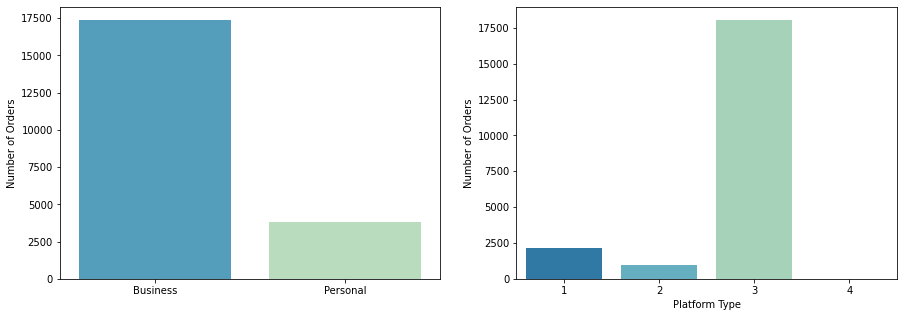

In [27]:
plt.subplot(1,2,1)
sns.countplot(x=df['Personal or Business'], palette='GnBu_r')
plt.xlabel('')
plt.ylabel('Number of Orders')
fig = plt.gcf()
fig.set_size_inches( 15, 5)

plt.subplot(1,2,2)
sns.countplot(x=df['Platform Type'], palette='GnBu_r')
plt.xlabel('Platform Type')
plt.ylabel('Number of Orders')
fig = plt.gcf()
fig.set_size_inches( 15, 5)

plt.show()

In [0]:
#One hot encode 'Personal or Business' and 'Platform Type' columns. Drop first column of each attribute to avoid the dummy variable trap.

df = pd.get_dummies(df, columns=['Personal or Business'], drop_first=True)
df = pd.get_dummies(df, columns=['Platform Type'], drop_first=True)

#### Categorical variables: Pickup and destination latitude and longitude data

In [0]:
#Transform latitude and longitude into geohashes which encodes a geographic location into a short string of letters and digits.
#We selected precision = 6 to divide the area where pickups and deliveries occur into 1200 m x 609.4 m bins.
#Provides approximate area sizes: https://www.elastic.co/guide/en/elasticsearch/reference/current/search-aggregations-bucket-geohashgrid-aggregation.html

geo_df = df.loc[:, ['Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long']]
geo_df['pickup'] = 0
geo_df['dest'] = 0
for i in range(len(geo_df)):
    geo_df.iloc[i, 4] = pgh.encode(geo_df.iloc[i, 0], geo_df.iloc[i, 1], precision=6)
    geo_df.iloc[i, 5] = pgh.encode(geo_df.iloc[i, 2], geo_df.iloc[i, 3], precision=6)

# Make a dictionary of geohash labels

labels = list(set(list(geo_df['pickup']) + list(geo_df['dest'])))
vals = [i + 1 for i in list(range(0, len(labels)))]
geohash_dict = dict(zip(labels, vals))

#Transform geohash labels using the dictionary
geo_df['pickup_label'] = geo_df['pickup'].apply(lambda i: geohash_dict[i] if i in geohash_dict.keys() else 0)
geo_df['dest_label'] = geo_df['dest'].apply(lambda i: geohash_dict[i] if i in geohash_dict.keys() else 0)

#Add to df
df['pickup_geohash'] = geo_df['pickup_label']
df['dest_geohash'] = geo_df['dest_label']

In [30]:
#Draw interactive map showing geohash grid and deliveries

lat, lng = (-1.28333, 36.8166695) #Coordinates for Nairobi, Kenya
m = folium.Map((lat, lng), zoom_start=12)

#Transform geohashes to polygons that can be drawn on the map
geohash_bins = list(map(lambda a: geohash_to_polygon(a), labels))

for i in range(len(geohash_bins)):
  folium.Choropleth(geohash_bins[i], fill_color='grey', fill_opacity=0.3, line_opacity=0.3).add_to(m)

#Draw heatmap showing delivery areas on the map
from folium.plugins import HeatMap

geo_df['Pickup Lat'] = geo_df['Pickup Lat'].astype(float)
geo_df['Destination Lat'] = geo_df['Destination Lat'].astype(float)

heat_df = geo_df[['Destination Lat', 'Destination Long']]
heat_data = [[row['Destination Lat'],row['Destination Long']] for index, row in heat_df.iterrows()]

HeatMap(heat_data).add_to(m)

m

### Continuous variables: Encoding date and time attributes

In [0]:
#Transform time columns into 24 hour format

df['Placement - Time'] = pd.to_datetime(df['Placement - Time'], format='%I:%M:%S %p')
df['Confirmation - Time'] = pd.to_datetime(df['Confirmation - Time'], format='%I:%M:%S %p')
df['Arrival at Pickup - Time'] = pd.to_datetime(df['Arrival at Pickup - Time'], format='%I:%M:%S %p')
df['Pickup - Time'] = pd.to_datetime(df['Pickup - Time'], format='%I:%M:%S %p')

In [0]:
#Calculate intervals between all time columns. This format is the same as the given dependent variable, 'Time from Pickup to Arrival'

df['time_Con - Pl'] = (df['Confirmation - Time'] - df['Placement - Time']).astype('timedelta64[s]').astype(np.int64)
df['time_Arr P - Con'] = (df['Arrival at Pickup - Time'] - df['Confirmation - Time']).astype('timedelta64[s]').astype(np.int64)
df['time_P - Arr P'] = (df['Pickup - Time'] - df['Arrival at Pickup - Time']).astype('timedelta64[s]').astype(np.int64)

In [0]:
#Drop rows that has negative time intervals (eg. not possible for the confirmation to happen before the order is placed)

ls = [col for col in df if col.startswith('time')]

for i in range(len(ls)):
    df = df.drop(df[df[ls[i]] <= 0].index)

In [0]:
#Calculate time in seconds from midnight

df['pl'] = df['Placement - Time']. apply(lambda x: (x - pd.to_datetime('12:00:00 AM', format='%I:%M:%S %p')).total_seconds())
df['con'] = df['Confirmation - Time']. apply(lambda x: (x - pd.to_datetime('12:00:00 AM', format='%I:%M:%S %p')).total_seconds())
df['arr p'] = df['Arrival at Pickup - Time']. apply(lambda x: (x - pd.to_datetime('12:00:00 AM', format='%I:%M:%S %p')).total_seconds())
df['p'] = df['Pickup - Time']. apply(lambda x: (x - pd.to_datetime('12:00:00 AM', format='%I:%M:%S %p')).total_seconds())

#sin/cos transformation of time values

df['pl_sin'] = df['pl'].apply(lambda x: np.sin(x*(2.*np.pi/86400))) #86400 sec/d
df['pl_cos'] = df['pl'].apply(lambda x: np.cos(x*(2.*np.pi/86400)))

df['con_sin'] = df['con'].apply(lambda x: np.sin(x*(2.*np.pi/86400)))
df['con_cos'] = df['con'].apply(lambda x: np.cos(x*(2.*np.pi/86400)))

df['arr p_sin'] = df['arr p'].apply(lambda x: np.sin(x*(2.*np.pi/86400)))
df['arr p_cos'] = df['arr p'].apply(lambda x: np.cos(x*(2.*np.pi/86400)))

df['p_sin'] = df['p'].apply(lambda x: np.sin(x*(2.*np.pi/86400)))
df['p_cos'] = df['p'].apply(lambda x: np.cos(x*(2.*np.pi/86400)))

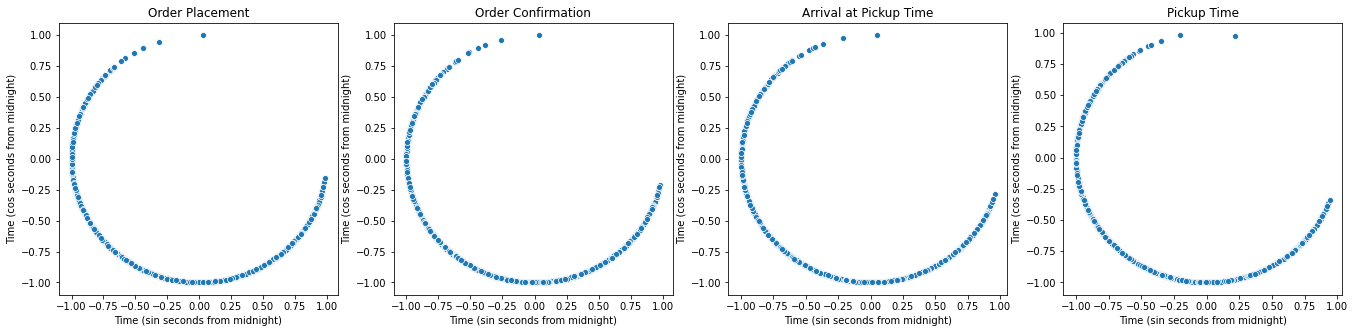

In [35]:
plt.subplot(1, 4, 1)
sns.scatterplot(x=df['pl_sin'], y=df['pl_cos'], palette='GnBu_r')
plt.title('Order Placement')
plt.xlabel('Time (sin seconds from midnight)')
plt.ylabel('Time (cos seconds from midnight)')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

plt.subplot(1, 4, 2)
sns.scatterplot(x=df['con_sin'], y=df['con_cos'], palette='GnBu_r')
plt.title('Order Confirmation')
plt.xlabel('Time (sin seconds from midnight)')
plt.ylabel('Time (cos seconds from midnight)')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

plt.subplot(1, 4, 3)
sns.scatterplot(x=df['arr p_sin'], y=df['arr p_cos'], palette='GnBu_r')
plt.title('Arrival at Pickup Time')
plt.xlabel('Time (sin seconds from midnight)')
plt.ylabel('Time (cos seconds from midnight)')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

plt.subplot(1, 4, 4)
sns.scatterplot(x=df['p_sin'], y=df['p_cos'], palette='GnBu_r')
plt.title('Pickup Time')
plt.xlabel('Time (sin seconds from midnight)')
plt.ylabel('Time (cos seconds from midnight)')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

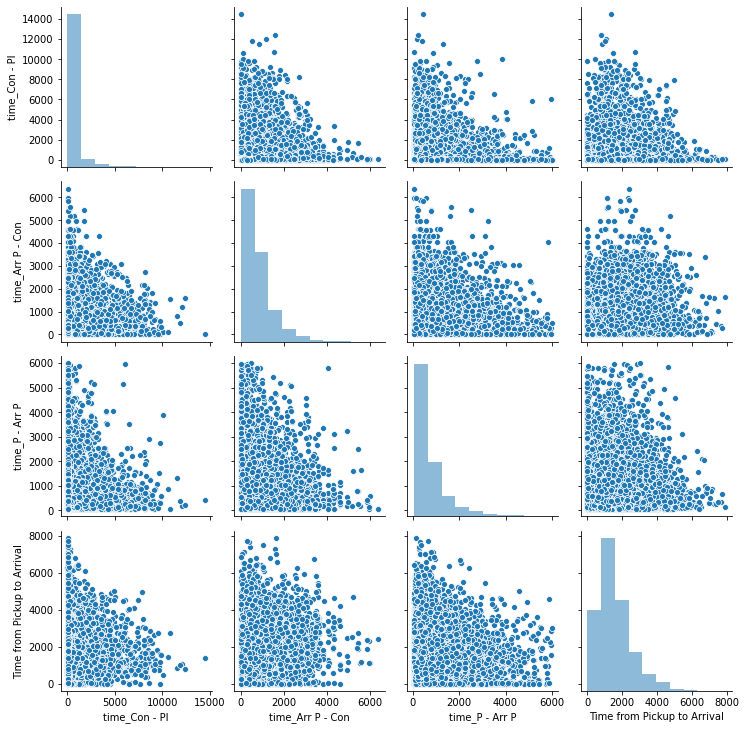

In [36]:
#Investigate relationships between time intervals

sns.pairplot(data=df,
        vars=['time_Con - Pl', 'time_Arr P - Con', 'time_P - Arr P', 'Time from Pickup to Arrival'],
        kind='scatter', palette='GnBu_r', diag_kws={'alpha':0.5})

plt.show()

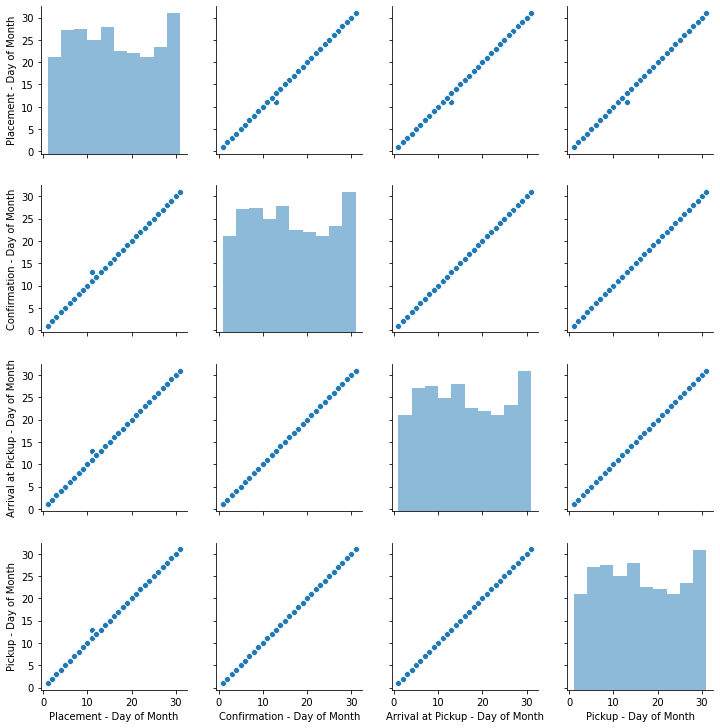

In [37]:
#Investigate relationships between 'Day of Month' columns

sns.pairplot(data=df,
        vars=['Placement - Day of Month', 'Confirmation - Day of Month', 'Arrival at Pickup - Day of Month', 'Pickup - Day of Month'],
        kind='scatter', palette='RdBu', diag_kws={'alpha':0.5})

plt.show()

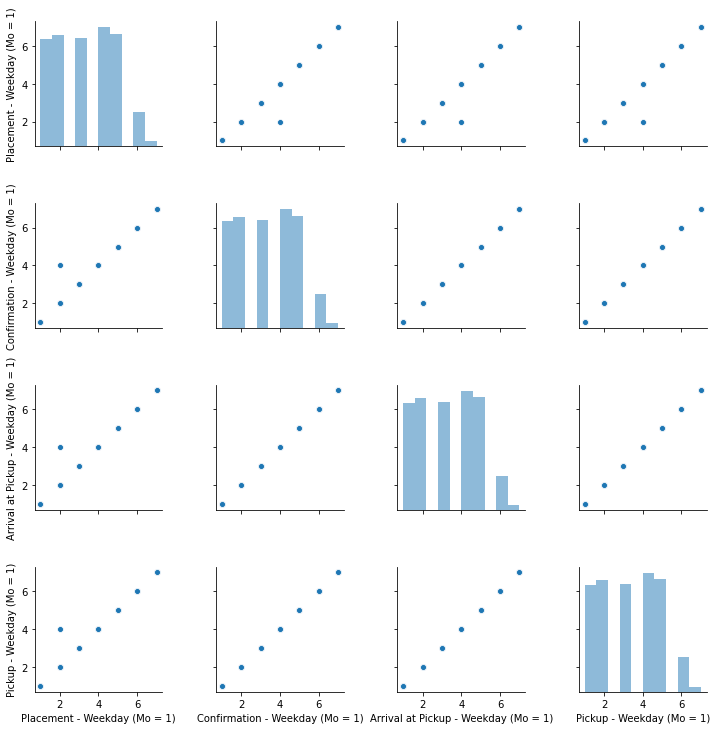

In [38]:
#Investigate relationships between 'Weekday' columns

sns.pairplot(data=df,
        vars=['Placement - Weekday (Mo = 1)', 'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)'],
        kind='scatter', palette='GnBu_r', diag_kws={'alpha':.5})

plt.show()

In [0]:
#Drop all but one columns that show multicolinearity
df['weekday'] = df['Pickup - Weekday (Mo = 1)']
df['month_day'] = df['Pickup - Day of Month']

ls = [col for col in df.columns if 'Weekday' in col] + [col for col in df.columns if 'Month' in col]

for i in range(len(ls)):
    df = df.drop(ls[i], axis=1)

In [0]:
#sin/cos transform 'Weekday'

df['weekday_sin'] = df['weekday'].apply(lambda x: np.sin(x*(2.*np.pi/7)))
df['weekday_cos'] = df['weekday'].apply(lambda x: np.cos(x*(2.*np.pi/7)))

#sin/cos transform 'Day of Month'

df['day_month_sin'] = df['month_day']. apply(lambda x: np.sin(x*(2.*np.pi/31)))
df['day_month_cos'] = df['month_day']. apply(lambda x: np.cos(x*(2.*np.pi/31)))

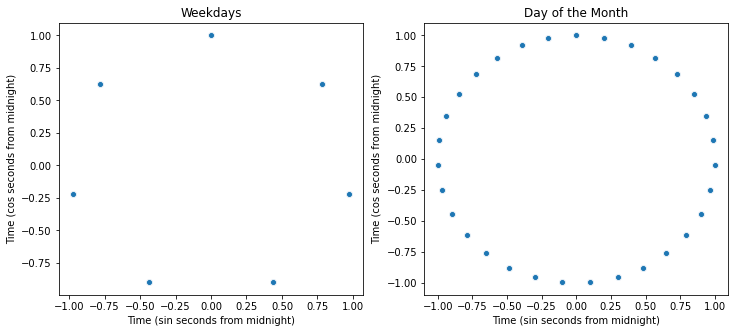

In [41]:
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['weekday_sin'], y=df['weekday_cos'], palette='GnBu_r')
plt.title('Weekdays')
plt.xlabel('Time (sin seconds from midnight)')
plt.ylabel('Time (cos seconds from midnight)')
fig = plt.gcf()
fig.set_size_inches( 12, 5)

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['day_month_sin'], y=df['day_month_cos'], palette='GnBu_r')
plt.title('Day of the Month')
plt.xlabel('Time (sin seconds from midnight)')
plt.ylabel('Time (cos seconds from midnight)')
fig = plt.gcf()
fig.set_size_inches( 12, 5)

# Target value (Time from Pickup to Arrival)
1. Remove outliers by speed (km/h)
2. Boxcox transformation of dependent variable (normal distribution)

In [42]:
#Evaluate shortest times for target value. Longest times might be due to some confounding effect such as traffic.

speed = df.loc[:, ['Time from Pickup to Arrival', 'Distance (KM)']]
speed['speed (km/h)'] = 0 #speed['Distance (KM)'] / (speed['Time from Pickup to Destination'] / 3600)
for i in range(len(speed)):
    speed.iloc[i, 2] = speed.iloc[i, 1] / (speed.iloc[i, 0] / 3600)

df['speed (km/h)'] = speed['speed (km/h)']

#Drop rows that have speeds in excess of 110 km/h (max legal driving speed between Uganda and Kenya)

print(len(df[df['speed (km/h)'] > 80]))
df = df.drop(df[df['speed (km/h)'] > 110].index)
df = df.drop('speed (km/h)', axis=1)
print(len(df))

957
20276


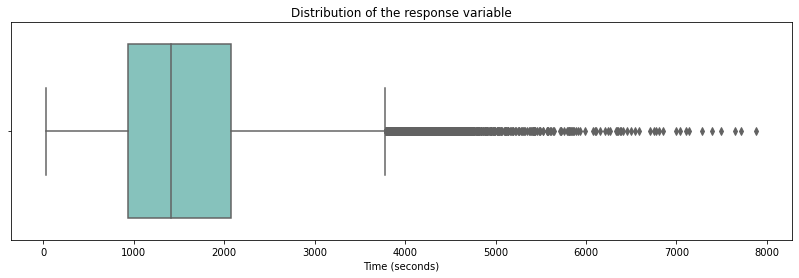

In [43]:
#Explore distribution of dependent variable

sns.boxplot(x=df['Time from Pickup to Arrival'], palette='GnBu_r')
plt.title('Distribution of the response variable')
plt.xlabel('Time (seconds)')
fig = plt.gcf()
fig.set_size_inches( 14, 4)

In [0]:
#Data shows many outliers to the right. Use boxcox transformation to adjust the y variable to a more normal distribution
from scipy.stats import boxcox
df['y_tf'] = boxcox(df['Time from Pickup to Arrival'])[0]

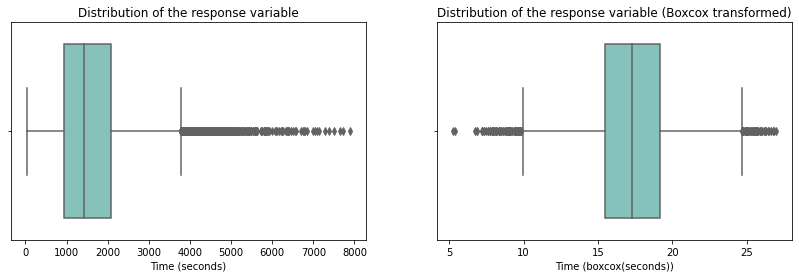

In [45]:
#Comparison of data before and after transformation
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Time from Pickup to Arrival'], palette='GnBu_r')
plt.title('Distribution of the response variable')
plt.xlabel('Time (seconds)')
fig = plt.gcf()
fig.set_size_inches( 14, 4)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['y_tf'], palette='GnBu_r')
plt.title('Distribution of the response variable (Boxcox transformed)')
plt.xlabel('Time (boxcox(seconds))')
fig = plt.gcf()
fig.set_size_inches( 14, 4)

plt.show()

In [0]:
#Remove outliers using the Z-score
from scipy.stats import zscore

In [47]:
df['y_tf_Z'] = zscore(df['y_tf'])
df = df.drop(df[(df['y_tf_Z'] > 3) | (df['y_tf_Z'] < -3)].index)
df=df.drop('y_tf_Z', axis=1)
print(len(df))

20204


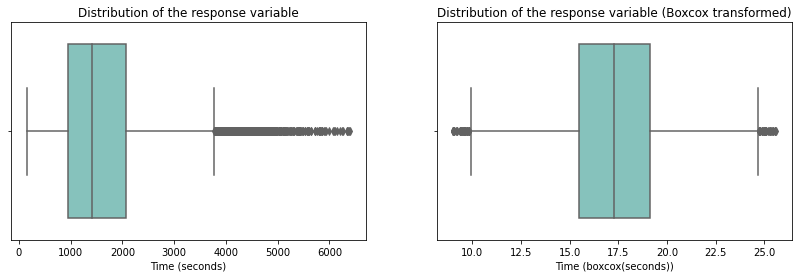

In [48]:
#Boxplot comparison after removing outliers

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Time from Pickup to Arrival'], palette='GnBu_r')
plt.title('Distribution of the response variable')
plt.xlabel('Time (seconds)')
fig = plt.gcf()
fig.set_size_inches( 14, 4)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['y_tf'], palette='GnBu_r')
plt.title('Distribution of the response variable (Boxcox transformed)')
plt.xlabel('Time (boxcox(seconds))')
fig = plt.gcf()
fig.set_size_inches( 14, 4)

plt.show()

In [49]:
#There are still numerous outliers present in the data. Filter outliers using the IQR.

Q1 = df['Time from Pickup to Arrival'].quantile(0.25)
Q3 = df['Time from Pickup to Arrival'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1134.0


In [50]:
df = df.drop(df[(df['Time from Pickup to Arrival'] < (Q1 - 1.5 * IQR)) | (df['Time from Pickup to Arrival'] > (Q3 + 1.5 * IQR))].index)
print(len(df))

19451


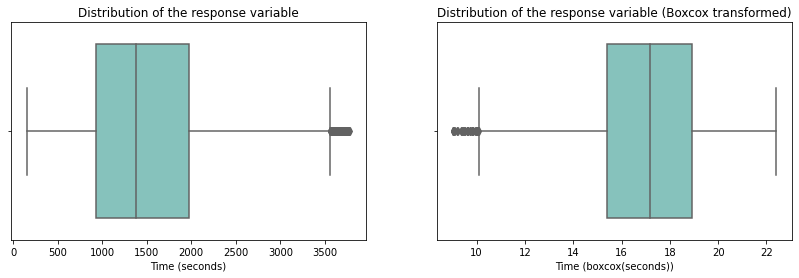

In [51]:
#Boxplot comparison after removing outliers

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Time from Pickup to Arrival'], palette='GnBu_r')
plt.title('Distribution of the response variable')
plt.xlabel('Time (seconds)')
fig = plt.gcf()
fig.set_size_inches( 14, 4)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['y_tf'], palette='GnBu_r')
plt.title('Distribution of the response variable (Boxcox transformed)')
plt.xlabel('Time (boxcox(seconds))')
fig = plt.gcf()
fig.set_size_inches( 14, 4)

plt.show()

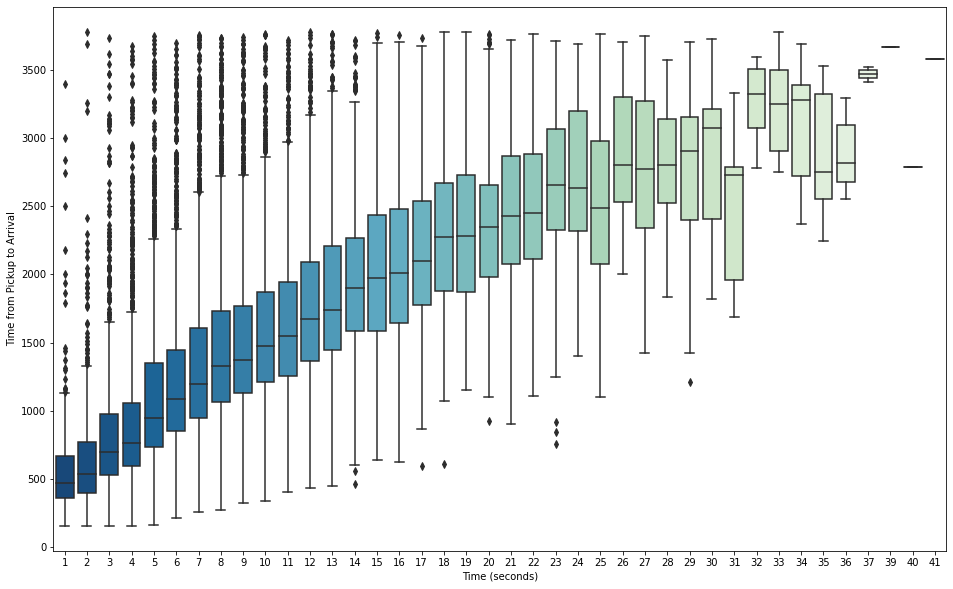

In [52]:
sns.boxplot(x=df['Distance (KM)'], y=df['Time from Pickup to Arrival'], palette='GnBu_r')
plt.xlabel('Time (seconds)')
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.show()

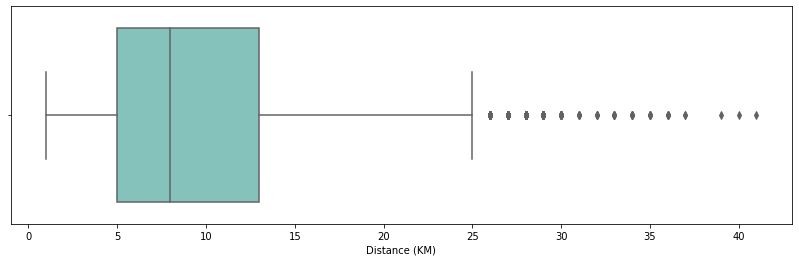

In [53]:
sns.boxplot(x=df['Distance (KM)'], palette='GnBu_r')
fig = plt.gcf()
fig.set_size_inches( 14, 4)

plt.show()

## Ranking riders
1. Rank riders by weighted rating value and efficiency

In [0]:
#Rank riders by weighted rating value and efficiency

riders['weighted_rating'] = 0
riders['deliveries_per_day'] = 0
total = sum(riders['No_of_Ratings'])

for i in range(len(riders)):
    riders.iloc[i, 5] = riders.iloc[i, 3] * (riders.iloc[i, 4] / total)
    riders.iloc[i, 6] = riders.iloc[i, 1] / riders.iloc[i, 2]
    
riders = riders.sort_values('weighted_rating', ascending=False).reset_index()
riders['ranking'] = riders.index

In [0]:
#Create merged dataset

df = pd.merge(df, riders, how='left', left_on=['Rider Id'], right_on=['Rider Id'])

#df = df.drop(['Average_Rating', 'No_of_Ratings', 'Rider Id'], axis = 1)

In [0]:
df = df.set_index('Order No')

## Temperature
1. Calculate mean temperature per hour
2. Fill missing values with mean temperiture values

In [0]:
#Calculate mean temperature per hour

temp_adj = df.loc[:, ['Temperature', 'Placement - Time']]
temp_adj['hour'] = temp_adj['Placement - Time'].apply(lambda x: x.hour)
mean_temps = temp_adj.drop(temp_adj[temp_adj['Temperature'].isna()].index)
mean_temps = mean_temps.groupby(['hour'], as_index=False).mean()

#Replace nan Temperatures with mean per hour

a = temp_adj['Temperature'].isna()

for i in range(len(a)):
    if a.iloc[i] == True:
        temp_adj.iloc[i, 0] = mean_temps.loc[mean_temps['hour'] == temp_adj.iloc[i, 2], 'Temperature'].values[0]

df['temp_adj'] = temp_adj['Temperature']
df = df.drop('Temperature', axis=1)

In [0]:
#Move dependent variable to the end

df['Time from Pickup to Arrival'] = df.pop('Time from Pickup to Arrival')
df['y_tf'] = df.pop('y_tf')

In [0]:
#Drop time columns

ls = ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time']
for i in range(len(ls)):
    df = df.drop(ls[i], axis=1)

## Distance

In [0]:
#Filter outliers using the IQR

#Q1 = df['Distance (KM)'].quantile(0.25)
#Q3 = df['Distance (KM)'].quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

In [0]:
#df = df.drop(df[(df['Distance (KM)'] < (Q1 - 1.5 * IQR)) | (df['Distance (KM)'] > (Q3 + 1.5 * IQR))].index)
#print(len(df))

In [0]:
#df['dist_Z'] = zscore(df['Distance (KM)'])
#df = df.drop(df[(df['dist_Z'] > 3) | (df['dist_Z'] < -3)].index)
#df=df.drop('dist_Z', axis=1)
#print(len(df))

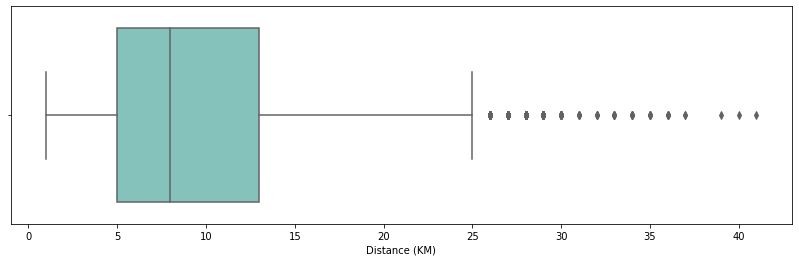

In [63]:
sns.boxplot(x=df['Distance (KM)'], palette='GnBu_r')
fig = plt.gcf()
fig.set_size_inches( 14, 4)

plt.show()

In [0]:
df_train = df.copy()

In [0]:
#df_train['Distance (KM)'] = np.log(df_train['Distance (KM)'])

In [66]:
### TEST COLUMNS TO REMOVE FROM df_train
df_train = df.drop(['User Id', 'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long', 'Rider Id', 'pl', 'con','arr p', 'p','pl_sin',
       'pl_cos', 'con_sin', 'con_cos', 'arr p_sin', 'arr p_cos', 'p_sin', 'p_cos', 'weekday_sin', 'weekday_cos', 'day_month_sin', 'day_month_cos','index','No_Of_Orders','Age','Average_Rating', 'weighted_rating','No_of_Ratings','y_tf'], axis=1)
df_train.head(10)


,Distance (KM),Personal or Business_Personal,Platform Type_2,Platform Type_3,Platform Type_4,pickup_geohash,dest_geohash,time_Con - Pl,time_Arr P - Con,time_P - Arr P,weekday,month_day,deliveries_per_day,ranking,temp_adj,Time from Pickup to Arrival
Order No,,,,,,,,,,,,,,,,
Order_No_4211,4,0,0,1,0,318,749,264,1477,1363,5,9,1.250573,325,20.400000,745
Order_No_25375,16,1,0,1,0,679,5,425,1021,227,5,12,1.168142,612,26.400000,1993
Order_No_1899,3,0,0,1,0,522,749,199,410,209,2,30,4.227273,567,23.472132,455
Order_No_9336,9,0,0,1,0,335,34,31,711,310,5,15,3.130742,550,19.200000,1341
Order_No_27883,9,1,0,0,0,566,5,60,455,90,1,13,2.650229,327,15.400000,1214
Order_No_7408,9,0,0,1,0,331,353,82,759,534,5,14,2.730897,127,27.200000,3191
Order_No_22680,5,0,0,1,0,196,409,962,205,213,5,9,0.517986,743,20.300000,1380
Order_No_21578,3,0,0,1,0,34,462,72,440,67,1,11,1.904672,218,28.700000,646
Order_No_5234,9,0,0,1,0,462,162,305,3449,579,2,30,0.683544,807,23.275816,3398


# Modeling 

## Split data set into train and validation
Split the training set into training and validation sets (for simplicity, this way we don't need to submit on Zindi every test run)

In [0]:
#Create the matrix of features.
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Multiple Linear

In [69]:
#Training the Multiple Linear Regression model on the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
#Predicting the test set results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2080.98 2031.  ]
 [1453.9  1495.  ]
 [1925.2  1271.  ]
 ...
 [1311.29 1571.  ]
 [1263.03  860.  ]
 [1476.39 1356.  ]]


In [71]:
#Evaluating the model performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4082177882308471

In [72]:
#Evaluating the model performance

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

349053.77359252394
590.8077298009259


## Polynomial

In [73]:
#Training the Polynomial Linear Regression model on the Training set

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
#Predicting the test set results

y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2166.43 2031.  ]
 [1468.02 1495.  ]
 [1926.09 1271.  ]
 ...
 [1446.25 1571.  ]
 [1239.43  860.  ]
 [1501.07 1356.  ]]


In [75]:
#Evaluating the model performance

r2_score(y_test, y_pred)

0.4207507080615662

In [76]:
#Evaluating the model performance

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

341661.42067274475
584.5181097902312


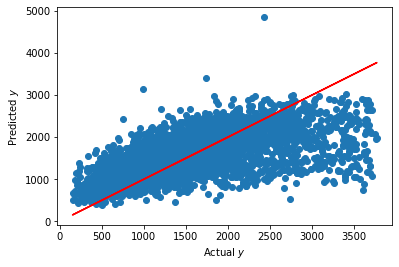

In [77]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,"r") # perfect model line
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

# Ridge

In [78]:
#Training the Multiple Linear Regression model on the Training set

from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [79]:
#Predicting the test set results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2080.96 2031.  ]
 [1453.9  1495.  ]
 [1925.2  1271.  ]
 ...
 [1311.29 1571.  ]
 [1263.    860.  ]
 [1476.36 1356.  ]]


In [80]:
#Evaluating the model performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.40821676587679523

In [81]:
#Evaluating the model performance

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

349054.3766125753
590.8082401359812


# Lasso

In [82]:
#Training the Multiple Linear Regression model on the Training set

from sklearn.linear_model import Lasso
regressor = Lasso()
regressor.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [83]:
#Predicting the test set results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2077.89 2031.  ]
 [1454.8  1495.  ]
 [1926.62 1271.  ]
 ...
 [1312.01 1571.  ]
 [1241.45  860.  ]
 [1453.94 1356.  ]]


In [84]:
#Evaluating the model performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.40835169978512453

In [85]:
#Evaluating the model performance

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

348974.7878906583
590.7408804972433


## SVR

In [0]:
y_train_2 = np.reshape(y_train,(len(y_train), 1))

In [0]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_2 = sc_X.fit_transform(X_train)
y_train_2 = sc_y.fit_transform(y_train_2)

In [88]:
#Training the SVR model on the Training set

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_2, y_train_2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [89]:
#Predicting the test set results

y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2111.91 2031.  ]
 [1366.72 1495.  ]
 [1915.11 1271.  ]
 ...
 [1215.18 1571.  ]
 [1204.75  860.  ]
 [1428.64 1356.  ]]


In [90]:
#Evaluating the model performance

r2_score(y_test, y_pred)

0.3949573567016469

In [91]:
#Evaluating the model performance

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

356875.2382676706
597.3903566912263


## Decision Tree Regression

In [92]:
#Training the Decision Tree Regression model on the Training set

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [93]:
#Predicting the test set results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2885. 2031.]
 [ 831. 1495.]
 [1483. 1271.]
 ...
 [1691. 1571.]
 [1199.  860.]
 [2903. 1356.]]


In [94]:
#Evaluating the model performance

r2_score(y_test, y_pred)

-0.2051518237216856

In [95]:
#Evaluating the model performance

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

710840.5481881264
843.1136033703444


## Random Forest Regression

In [0]:
#Training the Random Forest Regression model on the Training set

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
ls = [1,10,20,50,100,500,1000]
scores = []
y_pred = 0

for i in range(len(ls)):
  regressor = RandomForestRegressor(n_estimators = ls[i], random_state = 0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  scores = scores + [np.sqrt(mean_squared_error(y_test, y_pred))]


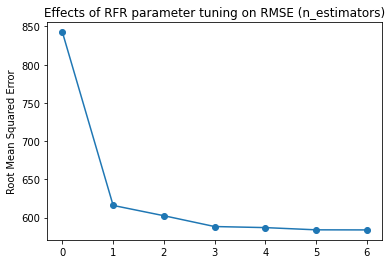

In [100]:
plt.plot(scores, marker='o')
plt.ylabel('Root Mean Squared Error')
plt.title('Effects of RFR parameter tuning on RMSE (n_estimators)')
plt.show()

In [0]:
#Predicting the test set results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [0]:
#Evaluating the model performance

r2_score(y_test, y_pred)

In [0]:
#Evaluating the model performance

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

In [0]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,"r") # perfect model line
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

## Saving a model with Pickle

In [0]:
import pickle

model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)

In [0]:
model_load_path = "mlr_model.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)